<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/SNS/SNS_ACT3_4/Ejercicio_SNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalación de librerías necesarias

In [1]:
!pip install imbalanced-learn
!pip install skimpy

# 2. Importación de librerías esenciales

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from google.colab import files
from collections import Counter
from sklearn.model_selection import KFold


# 3. Cargar los datos

In [3]:
# Cargar los archivos CSV
training_values_path = "/content/training_values.csv"
training_labels_path = "/content/training_labels.csv"

training_values = pd.read_csv(training_values_path)
training_labels = pd.read_csv(training_labels_path)

# Ver las primeras filas de los datos
training_labels

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


#4. Descripción del dataset

In [4]:
# Descripción del dataset
print("Descripción del Dataset:")
print("- Origen: El dataset contiene información sobre puntos de agua en Tanzania.")
print("- status_group: Indica si el punto de agua funciona ('functional'), tiene fallas ('functional needs repair') o no funciona ('non functional').")
print("Características:")
print(training_values.info())

Descripción del Dataset:
- Origen: El dataset contiene información sobre puntos de agua en Tanzania.
- status_group: Indica si el punto de agua funciona ('functional'), tiene fallas ('functional needs repair') o no funciona ('non functional').
Características:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB
None


# 5. Preprocesamiento de datos


In [22]:
# 2. Preprocesamiento de datos
# Manejo de valores faltantestraining_values.fillna("Unknown", inplace=True)

# Manejo de valores nulos
training_values.fillna("Unknown", inplace=True)

# Codificar variables categóricas
categorical_columns = training_values.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    training_values[col] = le.fit_transform(training_values[col])
    label_encoders[col] = le

# Juntar los valores y etiquetas
data = training_values.merge(training_labels, on='id')
data

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,0,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


# 6. Exploración inicial de los datos

In [23]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 59400  │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 41     │ │ int64       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column              ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id                  │   0 │     0 │   37120 │  21450 │      0 │  18520 │  37060 │  55660 │  74250 │ ██████ │  │
│ │ status_group        │   0 │     0 │  0.8412 │ 0.9498 │      0 │      0 │      0 │      2 │      2 │ █  ▁ ▆ │  │
│ │ amount_tsh          │   0 │     0 │   317.7 │   2998 │      0 │      0 │      0 │     20 │ 350000 │   █    │  │
│ │ gps_height          │   0 │     0 │   668.3 │  693.1 │    -90 │      0 │    369 │   1319 │   2770 │ █▁▃▃▁  │  │
│ │ longitude           │   0 │     0 │   34.08 │  6.567 │      0 │  33.09 │  34.91 │  37.18 │  40.35 │     ▃█ │  │
│ │ latitude            │   0 │     0 │  -5.706 │  2.946 │ -11.65 │ -8.541 │ -5.022 │ -3.326 │ -2e-08 │ ▃▆▄▆█▃ │  │
│ │ num_private         │   0 │     0 │  0.4741 │  12.24 │      0 │      0 │      0 │      0 │   1776 │   █    │  │
│ │ region_code         │   0 │     0 │    15.3 │  17.59 │      1 │      5 │     12 │     17 │     99 │   █▂   │  │
│ │ district_code       │   0 │     0 │    5.63 │  9.634 │      0 │      2 │      3 │      5 │     80 │   █    │  │
│ │ population          │   0 │     0 │   179.9 │  471.5 │      0 │      0 │     25 │    215 │  30500 │   █    │  │
│ │ construction_year   │   0 │     0 │    1301 │  951.6 │      0 │      0 │   1986 │   2004 │   2013 │ ▄    █ │  │
│ └─────────────────────┴─────┴───────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                 ┃ true             ┃ true rate                  ┃ hist              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ public_meeting                         │            54345 │                       0.91 │      ▁    █       │  │
│ │ permit                                 │            41908 │                       0.71 │      ▃    █       │  │
│ └────────────────────────────────────────┴──────────────────┴────────────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━

#7. Visualización de correlaciones

7.1 Matriz de correlación

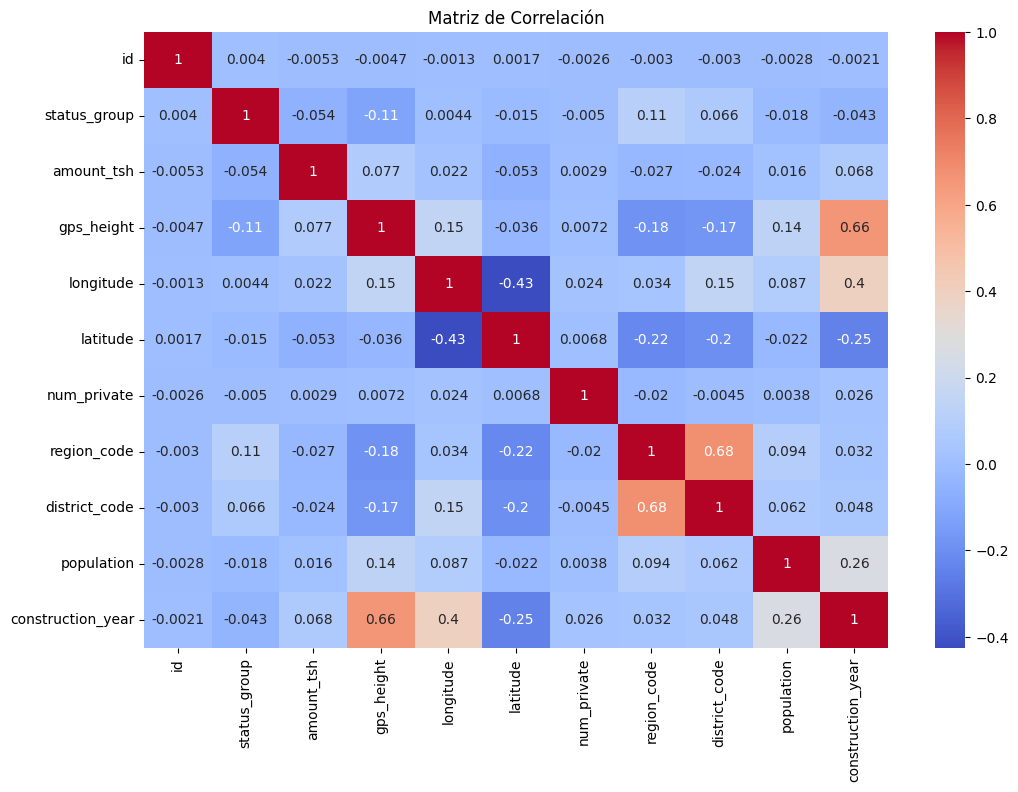

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

7.2 Matriz de dispersión

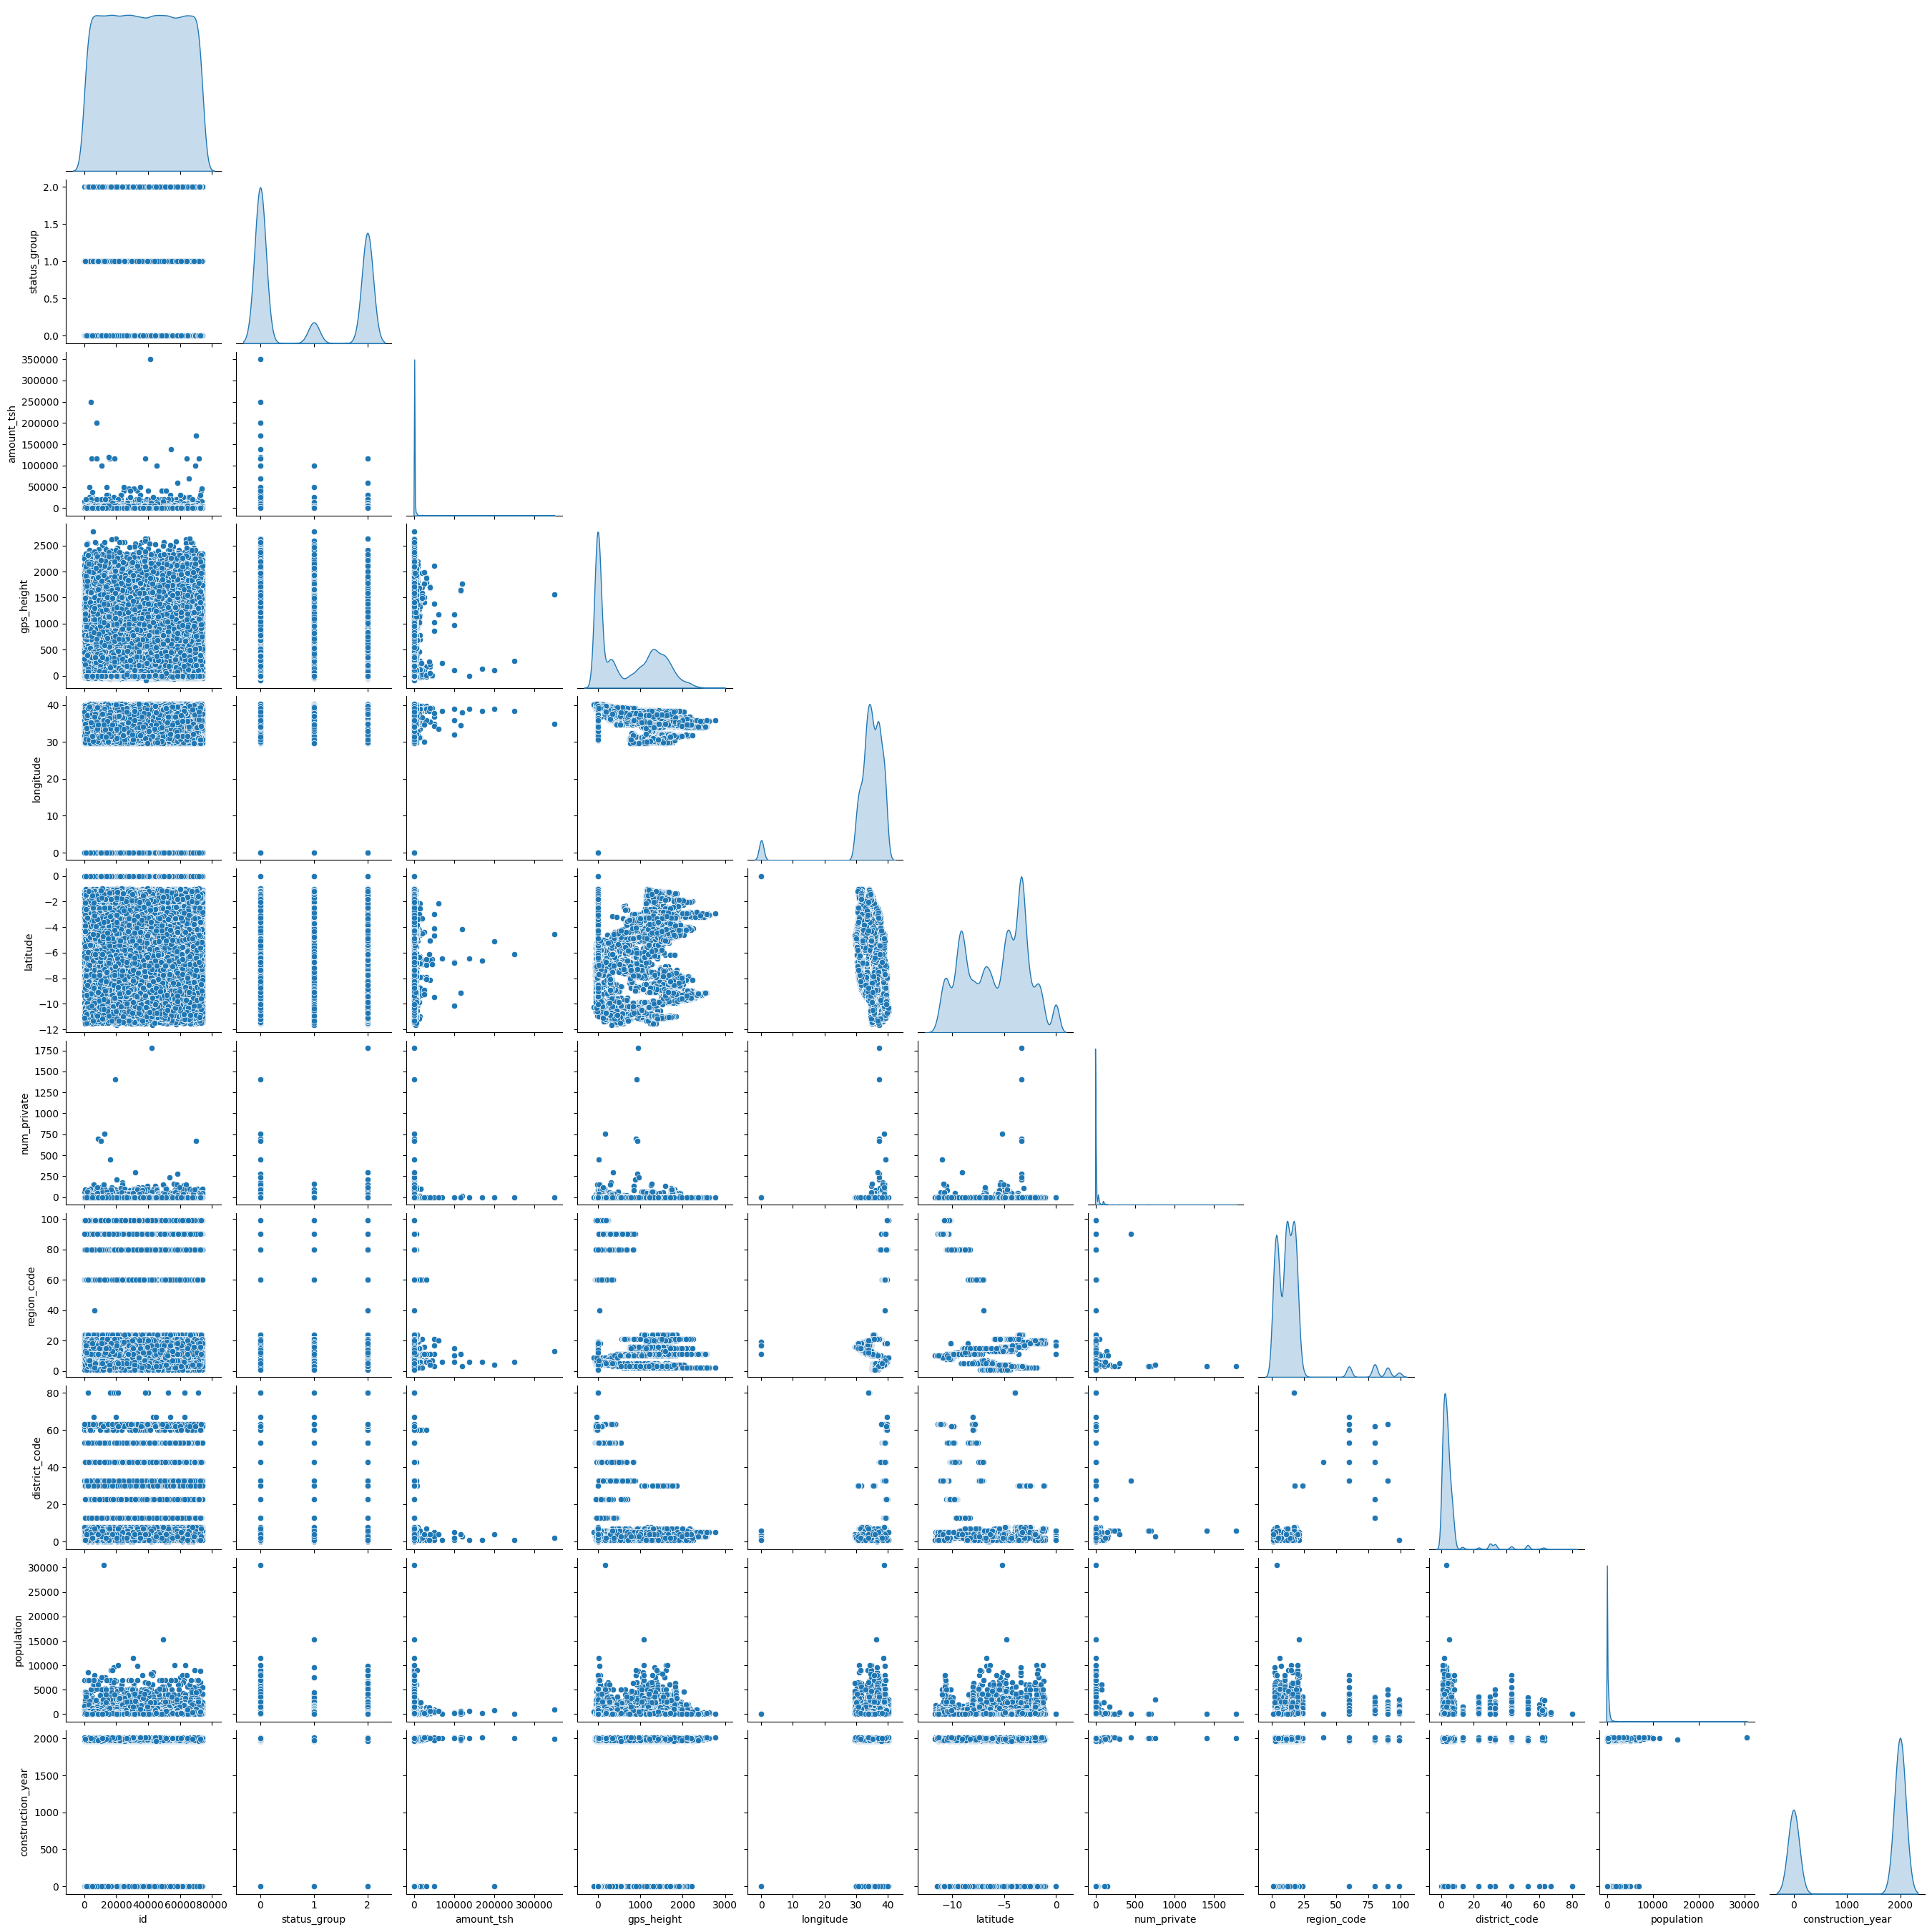

In [25]:
sns.pairplot(data.select_dtypes(include=['number']), diag_kind='kde', corner=True)
plt.show()

7.3 SelecKBest

In [26]:
X = data.drop(columns=['id', 'status_group'])
y = data['status_group']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_numeric = X.select_dtypes(include=['number'])  # Usar solo columnas numéricas

# Asegurarse de que los valores sean no negativos
X_numeric = X_numeric + np.abs(X_numeric.min())

selector = SelectKBest(score_func=chi2, k=7)
try:
    X_selected = selector.fit_transform(X_numeric, y)
    selected_features = X_numeric.columns[selector.get_support()]
    print(f"Características seleccionadas: {selected_features.tolist()}")
except ValueError as e:
    print("Error al seleccionar características con SelectKBest. Asegúrate de que todas las columnas sean numéricas y no negativas.", e)
    selected_features = X_numeric.columns  # Mantener solo columnas numéricas
    print(f"Características seleccionadas: {selected_features.tolist()}")
except ValueError as e:
    print("Error al seleccionar características con SelectKBest. Asegúrate de que todas las columnas sean numéricas.", e)
    selected_features = X_numeric.columns  # Mantener solo columnas numéricas
    print(f"Características seleccionadas: {selected_features.tolist()}")
except ValueError as e:
    print("Error al seleccionar características con SelectKBest. Asegúrate de que todas las columnas sean numéricas.", e)
    selected_features = X.select_dtypes(include=['number']).columns  # Mantener solo columnas numéricas

# Reflexión sobre las características elegidas
print("Las características seleccionadas muestran alta relevancia estadística según la prueba chi-cuadrado.")


Características seleccionadas: ['amount_tsh', 'gps_height', 'longitude', 'region_code', 'district_code', 'population', 'construction_year']
Las características seleccionadas muestran alta relevancia estadística según la prueba chi-cuadrado.


#10. División de los datos en entrenamiento y prueba

In [28]:
X = data[selected_features]
y = data['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#11. Modelados con Naive Bayes

In [29]:
# Clasificadores y comparación

names = ["GaussianNB", "BernoulliNB"]
classifiers = [GaussianNB(), BernoulliNB()]

for name, clf in zip(names, classifiers):
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    # Predecir y evaluar
    score = clf.score(X_test, y_test)  # Precisión promedio
    print(f"Modelo: {name} = {score:.2f}")

Modelo: GaussianNB = 0.46
Modelo: BernoulliNB = 0.50


11.1 Sin Cross Validation

In [30]:
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión sin Cross Validation: {accuracy}")
print(classification_report(y_test, y_pred))

Precisión sin Cross Validation: 0.5038720538720539
              precision    recall  f1-score   support

           0       0.56      0.68      0.61      6457
           1       0.00      0.00      0.00       851
           2       0.40      0.36      0.38      4572

    accuracy                           0.50     11880
   macro avg       0.32      0.34      0.33     11880
weighted avg       0.46      0.50      0.48     11880



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


11.2 Con Cross Validation

In [33]:
# Filtrar solo las columnas numéricas del dataset
X_numeric = X.select_dtypes(include=['number'])  # Seleccionar columnas numéricas únicamente

# Validación cruzada con los datos numéricos
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_numeric):
    X_train_kf, X_test_kf = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train_kf, y_train_kf)  # Entrenar el modelo
    y_pred_kf = model.predict(X_test_kf)  # Hacer predicciones
    accuracies.append(accuracy_score(y_test_kf, y_pred_kf))  # Calcular precisión

print(f"Precisión con Cross Validation: {np.mean(accuracies)}")

Precisión con Cross Validation: 0.5065824915824916


#14. Herramienta adicional: PCA para selección de características

In [34]:
# Filtrar solo las columnas numéricas del dataset
X_numeric = X.select_dtypes(include=['number'])  # Seleccionar columnas numéricas únicamente

# Aplicar PCA a las columnas numéricas
pca = PCA(n_components=5)  # Número de componentes principales
X_pca = pca.fit_transform(X_numeric)  # Transformar los datos

# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por las componentes principales:", pca.explained_variance_ratio_)

# Si deseas observar las componentes transformadas
print("Datos transformados con PCA:")
print(X_pca[:5])  # Mostrar las primeras 5 filas

Varianza explicada por las componentes principales: [8.48915314e-01 1.11783307e-01 2.19304922e-02 1.73326290e-02
 3.08814977e-05]
Datos transformados con PCA:
[[ 5.71111447e+03  7.74727373e+02 -2.92040990e+02  1.91872320e+01
   3.56966770e-01]
 [-2.84796422e+02  1.00195580e+03 -1.98338264e+02  1.53717050e+02
   6.32025412e+00]
 [-2.74180586e+02  6.24847939e+02  2.52942959e+02 -2.51125070e+02
   8.21434860e-01]
 [-3.08803242e+02  3.61541867e+02  3.95487086e+02 -6.07137426e+02
   8.36753032e+01]
 [-3.63989440e+02 -1.45789450e+03 -8.14302755e+01  8.37957007e+01
   1.22380665e+00]]


# 15. Entrenamiento del modelo con PCA

In [35]:
# Redefinir el modelo usando PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Precisión usando PCA: {accuracy_pca}")

Precisión usando PCA: 0.547979797979798


# 16. Generación de CSV con la predicción

In [38]:
# Suponiendo que X_train, y_train y X_test ya están definidos
# Entrenamiento del modelo usando PCA
pca = PCA(n_components=5)  # Reducir a 5 componentes principales
X_train_pca = pca.fit_transform(X_train)  # Ajustar PCA y transformar datos de entrenamiento

# Entrenar el modelo con los datos transformados por PCA
model = BernoulliNB()
model.fit(X_train_pca, y_train)

# Subir el archivo de predicción
uploaded = files.upload()

# Cargar el archivo subido
test_data_path = list(uploaded.keys())[0]
new_data = pd.read_csv(test_data_path)

# Usar solo las columnas comunes entre el conjunto de entrenamiento y el conjunto de prueba
train_columns = X_train.columns
test_columns = new_data.columns

# Encontrar las columnas comunes entre el conjunto de entrenamiento y el conjunto de prueba
common_columns = train_columns.intersection(test_columns)

# Filtrar los datos para que solo contengan las columnas comunes
new_data_common = new_data[common_columns]


# Establecer el comportamiento futuro para evitar el FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# Limpiar las columnas numéricas para asegurar que no haya texto o caracteres no válidos
for col in new_data_common.columns:
    if new_data_common[col].dtype == 'object':
        new_data_common.loc[:, col] = new_data_common[col].replace({',': ''}, regex=True)  # Limpiar comas si las hubiera
        new_data_common.loc[:, col] = pd.to_numeric(new_data_common[col], errors='coerce')  # Convertir a float, forzando errores a NaN

# Reemplazar NaN con 0 usando `.loc` para evitar el SettingWithCopyWarning

new_data_common = new_data_common.fillna(0)


# Reemplazar los NaN con 0 o la media de cada columna
new_data_common.loc[:, :] = new_data_common.fillna(0)  # Reemplazar NaN con 0 o usa `.fillna(new_data_common.mean())` para usar la media

# Reemplazar los NaN con 0 o la media de cada columna
new_data_common.fillna(0, inplace=True)  # Reemplazar NaN con 0 o usa `.fillna(new_data_common.mean())` para usar la media


# Asegurarse de que las columnas categóricas estén codificadas correctamente
for col, le in label_encoders.items():
    if col in new_data_common.columns:
        new_data_common[col] = new_data_common[col].astype(str).apply(lambda x: x if x in le.classes_ else 'Unknown')
        le.classes_ = np.append(le.classes_, 'Unknown')  # Asegurarse de que incluye 'Unknown'
        new_data_common[col] = le.transform(new_data_common[col])

# Convertir las columnas de fecha a enteros, si existen
for col in datetime_columns:
    if col in new_data_common.columns:
        new_data_common[col] = pd.to_datetime(new_data_common[col], errors='coerce').view('int64')

# Seleccionar las mismas características que en el entrenamiento
new_data_common = new_data_common[train_columns]

# Transformar los nuevos datos usando el PCA entrenado
new_data_pca = pca.transform(new_data_common)

# Verificar las dimensiones de los datos transformados
print(f"Dimensiones del conjunto transformado por PCA: {new_data_pca.shape}")
print(f"Componentes principales esperadas: {pca.n_components_}")

# Realizar predicciones si las dimensiones son correctas
if new_data_pca.shape[1] == pca.n_components_:
    new_predictions = model.predict(new_data_pca)

    # Mapear las predicciones a etiquetas legibles
    status_decoder = {0: "non functional", 1: "functional needs repair", 2: "functional"}
    new_data['Predicción'] = new_predictions
    new_data['Predicción'] = new_data['Predicción'].map(status_decoder)

    # Mostrar solo las columnas id y Predicción
    result = new_data[['id', 'Predicción']]

    # Mostrar las primeras filas con las predicciones
    print(result.head())

    # Descargar los resultados como CSV
    result.to_csv("predicciones_pca.csv", index=False)
    files.download("predicciones_pca.csv")
else:
    print("Error: Las dimensiones transformadas por PCA no coinciden con las esperadas.")

Saving test_simple.csv to test_simple.csv
Dimensiones del conjunto transformado por PCA: (3691, 5)
Componentes principales esperadas: 5
      id      Predicción
0  50785  non functional
1  51630  non functional
2  17168  non functional
3  45559      functional
4  49871  non functional


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 17. Conclusión personal

El dataset elegido era muy grande, con muchas columnas y filas. Entre los datos habían muchos que eran irrelevantes para entrenar y predecir por lo que había que limpiar. Es posible que la limpieza no la haya hecho correctamente, además las variables a predecir no estaban balanceadas como se ve en el codigo de abajo. Esto pudo influir en que la predicción diera un valor tan bajo

In [ ]:
print(Counter(y_train))  # Ver el balance de clases en el conjunto de entrenamiento

Counter({0: 25802, 2: 18252, 1: 3466})
